[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


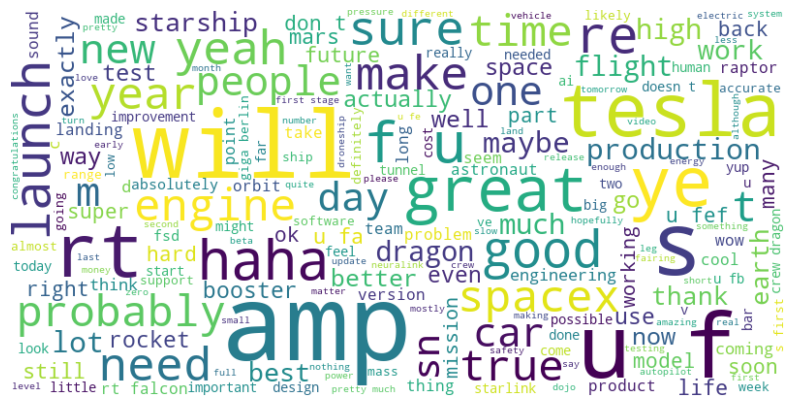

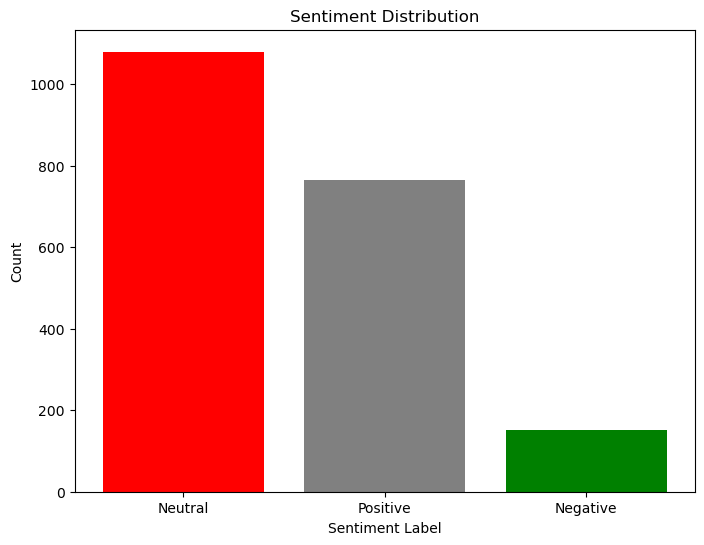

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob


nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\data science assingment\text mining\Elon_musk.csv", encoding='latin1') 

def preprocess_tweet(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = tweet.lower()
    tweet = tweet.strip()
    return tweet

df['cleaned_tweets'] = df['Text'].apply(preprocess_tweet)


def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Sentiment_Polarity'] = df['cleaned_tweets'].apply(get_sentiment_polarity)

df['Sentiment_Label'] = pd.cut(df['Sentiment_Polarity'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

all_words = ' '.join([tweet for tweet in df['cleaned_tweets']])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

sentiment_distribution = df['Sentiment_Label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_distribution.index, sentiment_distribution.values, color=['red', 'grey', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()